In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [10]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1' )
data = data[['v1', 'v2']]

In [11]:
data[:10]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
#v1 is the target, v2 is the text
#We need to label encode v1 (the target or the label) and create feature vector from v2

In [49]:
#label encode the label
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

data['label'] = labelEncoder.fit_transform(data['v1'])

#spam is 1, ham is 0

print(data.head())

     v1                                                 v2  NB predict  label
0   ham  Go until jurong point, crazy.. Available only ...           0      0
1   ham                      Ok lar... Joking wif u oni...           0      0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...           1      1
3   ham  U dun say so early hor... U c already then say...           0      0
4   ham  Nah I don't think he goes to usf, he lives aro...           0      0


In [59]:
#Process the data

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

sentences = data['v2']

tfidfVectorizer = TfidfVectorizer(encoding='ISO-8859-1')
X = tfidfVectorizer.fit_transform(sentences)

features_vector = pd.DataFrame(X.todense())
features_vector['label'] = data['label']
features_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,8663,8664,8665,8666,8667,8668,8669,8670,8671,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [60]:
values = features_vector
values.head()

,0,1,2,3,4,5,6,7,8,9,...,8663,8664,8665,8666,8667,8668,8669,8670,8671,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [61]:
#Separate independent variables and dependent variables
X = values.iloc[:,0:-1]
y = values.iloc[:,-1]

In [62]:
#Split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle= True )

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671
4487,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3256,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2311,0.0,0.234049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5115,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
443,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Navie bayes Train classification score:  0.9635897435897436
Navie bayes Test classification score:  0.9599282296650717
y_pred:  [0 0 0 ... 0 0 1]
cm:  [[1468    0]
 [  67  137]]
Navie bayes misclassification_rate %:  4.007177033492823
False negative sms: 
5       FreeMsg Hey there darling it's been 3 week's n...
34      Thanks for your subscription to Ringtone UK yo...
54      SMS. ac Sptv: The New Jersey Devils and the De...
56      Congrats! 1 year special cinema pass for 2 is ...
68      Did you hear about the new \Divorce Barbie\"? ...
138     You'll not rcv any more msgs from the chat svc...
146     FreeMsg Why haven't you replied to my text? I'...
158     Customer service annoncement. You have a New Y...
163     -PLS STOP bootydelious (32/F) is inviting you ...
164     BangBabes Ur order is on the way. U SHOULD rec...
226     Will u meet ur dream partner soon? Is ur caree...
234     Text & meet someone sexy today. U can find a d...
239     U 447801259231 have a secret admirer who

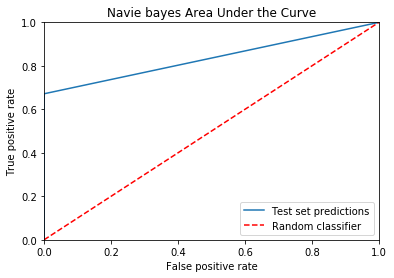

In [63]:
#let's create the classification model and check the results
#We will try MultinomialNB (naive bayes), AdaBoost, and DecisionTree and see which one gives better result

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

classifier.fit(X_train, y_train)

#Score
print('Navie bayes Train classification score: ',classifier.score(X_train, y_train))
print('Navie bayes Test classification score: ',classifier.score(X_test, y_test))

#Predict
y_pred = classifier.predict(X_test)
print('y_pred: ',y_pred)

#Metrics
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('cm: ', cm)

misclassification_rate = (cm[1,0] + cm[0,1]) / len(y_pred) * 100
print('Navie bayes misclassification_rate %: ',misclassification_rate)


data['NB predict'] = classifier.predict(X) #predict all data

#False negative (SMS that is spam but the model thought it was not)
fn_sms = data[ (data['NB predict'] == 0) & (data['label'] == 1)]['v2']
print('False negative sms: ')
print(fn_sms)
#We might need to add more features to increase the accuracy

print('-------------------------------------------------------------')


#False positive (SMS that is not spam but the model thought it was)
fp_sms = data[ (data['NB predict'] == 1) & (data['label'] == 0)]['v2']
print('False positive sms: ')
print(fp_sms)
#No false positives


#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10,shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
accuracies_mean = accuracies.mean()
accuracies_std = accuracies.std()
print('Navie bayes accuracies_mean: ',accuracies_mean)
print('Navie bayes accuracies_std: ',accuracies_std)


print('-------------------------------------------------')

#ROC and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

print('Navie bayes Area under the curve: ', area)

plt.plot(fpr, tpr, label='Test set predictions')

#plot the random classifier with equal opportunity
plt.plot([0,1],[0,1], 'k', color='red',linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Navie bayes Area Under the Curve')
plt.legend(loc='lower right')
plt.show()

----------------------------------------------------------------------------

AdaBoostClassifier Train classification score:  0.9807692307692307
AdaBoostClassifier Test classification score:  0.979066985645933
AdaBoostClassifier misclassification rate %:  2.0933014354066986
False negative sms: 
89
5       FreeMsg Hey there darling it's been 3 week's n...
19      England v Macedonia - dont miss the goals/team...
65      As a valued customer, I am pleased to advise y...
68      Did you hear about the new \Divorce Barbie\"? ...
414     100 dating service cal;l 09064012103 box334sk38ch
528     You will recieve your tone within the next 24h...
606     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
659     88800 and 89034 are premium phone services cal...
671            SMS. ac sun0819 posts HELLO:\You seem cool
712                 08714712388 between 10am-7pm Cost 10p
750     Do you realize that in about 40 years, we'll h...
762     Urgent Ur å£500 guaranteed award is still uncl...
868     Hello. We need some posh birds and chaps to us...
880     Reminder: You hav

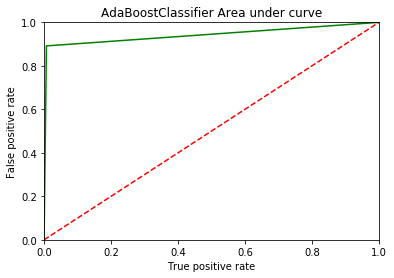

In [57]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()

classifier.fit(X_train, y_train)

#Score
print('AdaBoostClassifier Train classification score: ', classifier.score(X_train, y_train))
print('AdaBoostClassifier Test classification score: ', classifier.score(X_test, y_test))

#Predict
y_pred = classifier.predict(X_test)

#Metrics
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
misclassification_rate = (cm[1,0] + cm[0,1]) / len(y_pred) * 100

print('AdaBoostClassifier misclassification rate %: ', misclassification_rate)


data['AdaBoost predict'] = classifier.predict(X) #predict all data

#False negative (SMS that is spam but the model thought it was not)
fn_sms = data[ (data['AdaBoost predict'] == 0) & (data['label'] == 1)]['v2']
print('False negative sms: ')
print(fn_sms.size)
print(fn_sms)
#we have much less false positivies than Naive bayes, We might need to add more features to increase the accuracy though

print('-------------------------------------------------------------')

#False positive (SMS that is not spam but the model thought it was)
fp_sms = data[ (data['AdaBoost predict'] == 1) & (data['label'] == 0)]['v2']
print('False positive sms: ')
print(fp_sms)
#we have false positives, might need to add more features to increase accuracy

#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('AdaBoostClassifier accuracies mean: ', accuracies.mean())
print('AdaBoostClassifier accuracies std: ', accuracies.std())


print('--------------------------------------------------------------')


#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

print('AdaBoostClassifier Area under curve test set: ', area)

plt.plot(fpr, tpr, color='green')

#Plot random classifier (equal probability)
plt.plot([0,1],[0,1], 'k', color='red', linestyle='--')
plt.xlim([0 , 1])
plt.ylim([0, 1])
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoostClassifier Area under curve')

plt.show()

DecisionTreeClassifier classification score train:  0.9425641025641026
DecisionTreeClassifier classification score test:  0.9467703349282297
DecisionTreeClassifier misclassification_rate %  5.322966507177034
DecisionTreeClassifier accuracies mean:  0.9397003275355044
DecisionTreeClassifier accuracies std:  0.010913242580974022
False negative sms: 
299
5       FreeMsg Hey there darling it's been 3 week's n...
34      Thanks for your subscription to Ringtone UK yo...
42      07732584351 - Rodger Burns - MSG = We tried to...
54      SMS. ac Sptv: The New Jersey Devils and the De...
68      Did you hear about the new \Divorce Barbie\"? ...
95      Your free ringtone is waiting to be collected....
116     You are a winner U have been specially selecte...
134     Want 2 get laid tonight? Want real Dogging loc...
138     You'll not rcv any more msgs from the chat svc...
146     FreeMsg Why haven't you replied to my text? I'...
158     Customer service annoncement. You have a New Y...
159     

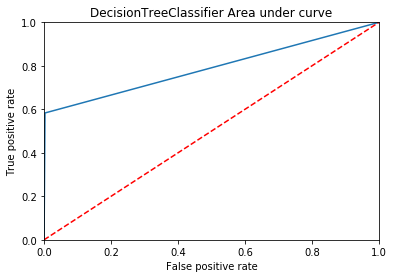

In [64]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)

classifier.fit(X_train, y_train)

#Score
print('DecisionTreeClassifier classification score train: ', classifier.score(X_train, y_train))
print('DecisionTreeClassifier classification score test: ', classifier.score(X_test, y_test))

#Predict
y_pred = classifier.predict(X_test)


#Metrics
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

misclassification_rate = (cm[1,0] + cm[0,1])/len(y_pred) * 100
print('DecisionTreeClassifier misclassification_rate % ', misclassification_rate)


#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('DecisionTreeClassifier accuracies mean: ', accuracies.mean())
print('DecisionTreeClassifier accuracies std: ', accuracies.std())


data['DecisionTreeClassifier predict'] = classifier.predict(X) #predict all data

#False negative (SMS that is spam but the model thought it was not)
fn_sms = data[ (data['DecisionTreeClassifier predict'] == 0) & (data['label'] == 1)]['v2']
print('False negative sms: ')
print(fn_sms.size)
print(fn_sms)
#we have much more false positivies than Naive bayes, We might need to add more features to increase the accuracy

print('-------------------------------------------------------------')

#False positive (SMS that is not spam but the model thought it was)
fp_sms = data[ (data['DecisionTreeClassifier predict'] == 1) & (data['label'] == 0)]['v2']
print('False positive sms: ')
print(fp_sms)
#we have false positives, might need to add more features to increase accuracy

#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('AdaBoostClassifier accuracies mean: ', accuracies.mean())
print('AdaBoostClassifier accuracies std: ', accuracies.std())


print('--------------------------------------------------------------------')

#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

print('DecisionTreeClassifier Area under curve test set: ', area)

plt.plot(fpr, tpr, label='Area under curve test set')

#Random classifier (equal opportunity)
plt.plot([0,1],[0,1], 'k', color='red', linestyle='--', label='Random classifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('DecisionTreeClassifier Area under curve')

plt.show()

<h2>Use count vectorizer and compare the results with Tfidf vectorizer</h2>

In [ ]:
countVectorizer = CountVectorizer(encoding='ISO-8859-1')

sentences = data['v2']
X = countVectorizer.fit_transform(sentences)

#print(countVectorizer.get_feature_names())

#Create data frame out of the count vectorizer output
features_vector = pd.DataFrame(X.todense())
#add label column
features_vector['label'] = data['v1']

In [ ]:
#Encode the label
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

features_vector['label'] = labelEncoder.fit_transform(features_vector['label'])

In [ ]:
#Separate independent variables from dependent variables
X = features_vector.values[:, 0:-1]
y = features_vector.values[:, -1]

In [ ]:
#Split the data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#let's create the classification model and check the results
#We will try MultinomialNB (naive bayes), AdaBoost, and DecisionTree and see which one gives better result

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

#train the mode
classifier.fit(X_train, y_train)

#Score
print('Navie bayes Train classification score: ',classifier.score(X_train, y_train))
print('Navie bayes Test classification score: ',classifier.score(X_test, y_test))


#Predict
y_pred = classifier.predict(X_test)

print('Metrics')
print('-----------------------')

#Metrics
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
misclassification_rate = (cm[1,0] + cm[0,1]) / len(y_pred) * 100
print('Naive bayes misclassification rate: ', misclassification_rate)


#ROC and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
print('Naive bayes area under curve: ', area)

plt.plot(fpr, tpr, label='Area under curve')

#Plot random classifier
plt.plot([0,1], [0,1], 'k', color='red', linestyle='--',label='Random classifier')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Naive bayes Area under curve')

plt.show()

#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y , scoring='accuracy', cv=cv)
print('Navie bayes accuracies_mean: ',accuracies_mean)
print('Navie bayes accuracies_std: ',accuracies_std)

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()

#Train the mode
classifier.fit(X_train, y_train)


#Score
print('AdaBoostClassifier Train classification score: ',classifier.score(X_train, y_train))
print('AdaBoostClassifier Test classification score: ', classifier.score(X_test, y_test))


#Predict
y_pred = classifier.predict(X_test)

print('Metrics')
print('-----------------------------------------------')

#Metrics
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
misclassification_rate = (cm[1,0] + cm[0,1]) / len(y_pred) * 100

print('AdaBoostClassifier misclassification rate: ', misclassification_rate)

#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('AdaBoostClassifer accuracies_mean: ',accuracies_mean)
print('AdaBoostClassifer accuracies_std: ',accuracies_std)

print('-----------------------------------------------')

#ROC and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
print('AdaBoostClassifier area under curve: ', area)

plt.plot(fpr, tpr, label='Area under curve')

plt.plot([0,1] , [0,1], 'k', color='red', linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('AdaBoostClassifer area under curve')

plt.show()

In [ ]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)

classifier.fit(X_train, y_train)

#Score
print('DecisionTreeClassifier classification score train: ', classifier.score(X_train, y_train))
print('DecisionTreeClassifier classification score test: ', classifier.score(X_test, y_test))

#Predict
y_pred = classifier.predict(X_test)


#Metrics
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

misclassification_rate = (cm[1,0] + cm[0,1])/len(y_pred) * 100
print('DecisionTreeClassifier misclassification_rate % ', misclassification_rate)


#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('DecisionTreeClassifier accuracies mean: ', accuracies.mean())
print('DecisionTreeClassifier accuracies std: ', accuracies.std())


print('--------------------------------------------------------------------')

#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

print('DecisionTreeClassifier Area under curve test set: ', area)

plt.plot(fpr, tpr, label='Area under curve test set')

#Random classifier (equal opportunity)
plt.plot([0,1],[0,1], 'k', color='red', linestyle='--', label='Random classifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('DecisionTreeClassifier Area under curve')

plt.show()

<h2>Word cloud to show the frequency of words used in spam messages</h2>

In [ ]:
from wordcloud import WordCloud
spam_sms = data[ data['v1'] == 'spam']['v2']
spam_sms.head()

sms_text = " ".join(spam_sms)
#sms_text
wc = WordCloud(width=800, height=400, background_color='white').generate(sms_text)
                          
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Conclusion</h2>

Naive bayes performs better with Count Vectorizer than Tfidf vectorizer
AdaBoostClassifer is slightly better with Tfidf vectorizer than counter vectorizer
Decision Tree Classifier performs better with Counter Vectorizer than Tfidf vectorizer